In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Gradient stuff

In [2]:
def f(x, y):
    return x**2 + y**2 # this will be the function we're wokring with here
    # feel free to put in your own

In [3]:
def partial_x(x, y):
    return 2 * x

def partial_y(x, y):
    return 2 * y

# I've hardcoded- again, the code fir this will be done later

In [4]:
def gradient(x, y):
    return np.array([partial_x(x, y), partial_y(x, y)])
    # define your gradient- remember that it combined both partials

In [5]:
# Meshgrid for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [6]:
# Gradient field
X_grad, Y_grad = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
U = partial_x(X_grad, Y_grad)
V = partial_y(X_grad, Y_grad)

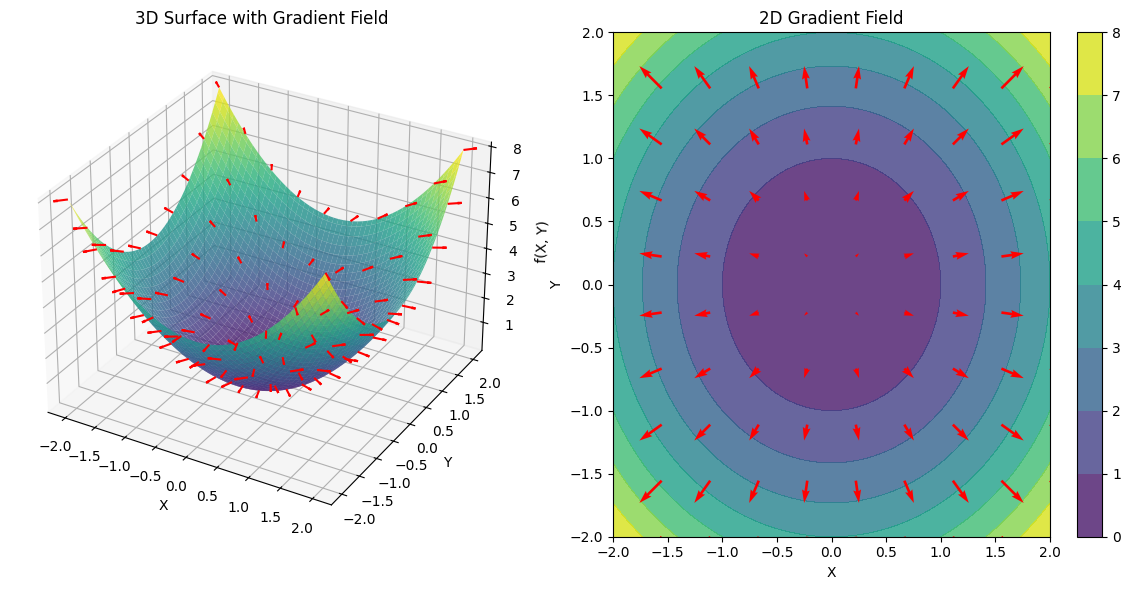

Gradient at [1 1]: [2 2]


In [10]:
# Plot the surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.quiver(X_grad, Y_grad, f(X_grad, Y_grad), U, V, 0, color='red', length=0.2, normalize=True)
ax.set_title("3D Surface with Gradient Field")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Plot the gradient vector field on a 2D contour plot because 3D is too fancy for us
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, cmap='viridis', alpha=0.8)
ax2.quiver(X_grad, Y_grad, U, V, color='red')
ax2.set_title("2D Gradient Field")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

point = np.array([1, 1])
grad = gradient(*point)
print(f"Gradient at {point}: {grad}")
# take a random point (1, 1)

### Curl

In [11]:
# These are our vector field components
def F_x(x, y, z):
    return -y

def F_y(x, y, z):
    return x

def F_z(x, y, z):
    return 0

In [12]:
# Compute the curl of the vector field
def curl(x, y, z):
    curl_x = 0 - 0  # d(Fz)/dy - d(Fy)/dz
    curl_y = 0 - 0  # d(Fx)/dz - d(Fz)/dx
    curl_z = 1 - (-1)  # d(Fy)/dx - d(Fx)/dy- we're just using the same stuff we discussed
    return np.array([curl_x, curl_y, curl_z])

In [13]:
# These are our grid points
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(-2, 2, 10)
X, Y, Z = np.meshgrid(x, y, z)

In [14]:
# The you compute vector field components
U = F_x(X, Y, Z)
V = F_y(X, Y, Z)
W = F_z(X, Y, Z)

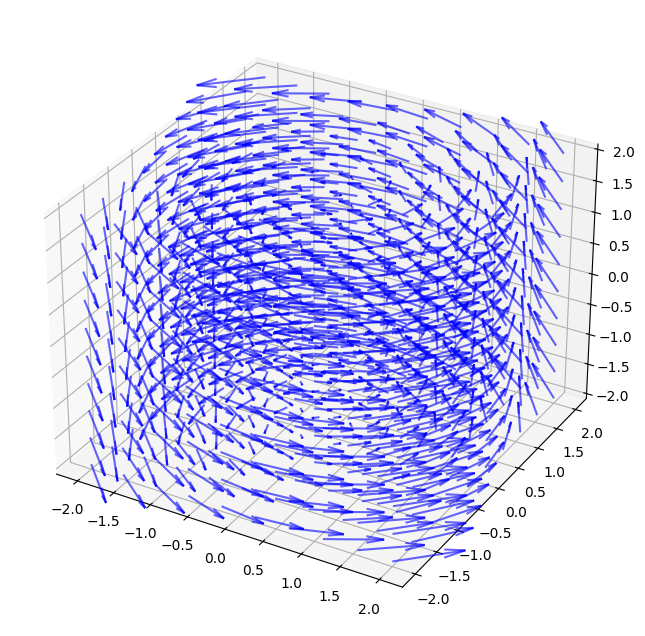

In [20]:
# Plot the vector field and its curl
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=0.3, color='blue', alpha=0.6)

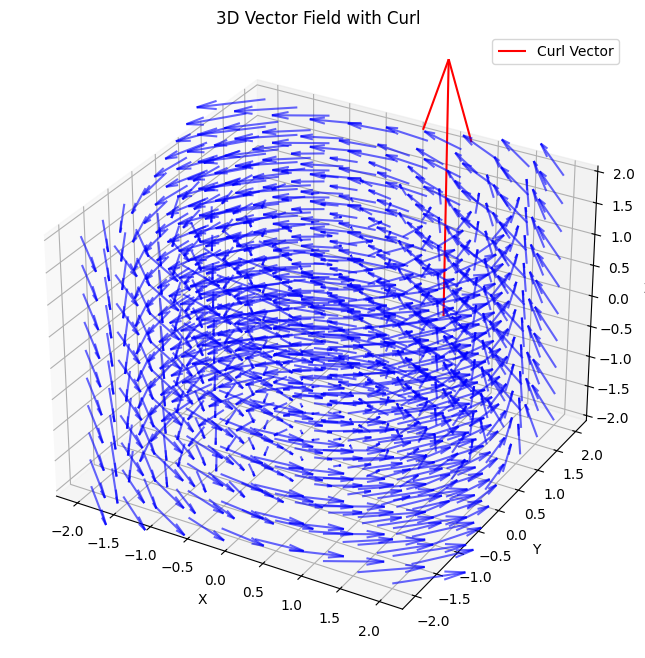

Curl at [1 1 0]: [0 0 2]


In [19]:
# Plot the vector field and its curl
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=0.3, color='blue', alpha=0.6)

# Show the curl at a point
point = np.array([1, 1, 0])
curl_at_point = curl(*point)
ax.quiver(point[0], point[1], point[2], *curl_at_point, color='red', length=2, label="Curl Vector")

ax.set_title("3D Vector Field with Curl")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# Print the curl at the specific point we've given
print(f"Curl at {point}: {curl_at_point}")